# Gradient Descent - Divergence and Overflow
This shows an example of how gradient descent can diverge and produce computational overflows when the cost function does not have minima.

To investigate this, the following cost function is used:
$$ h(x) = x^5 - 2 x^4 + 2 $$

## Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from gradient_descent import gradient_descent

In [2]:
# Create 1000 data points in the range +/2.5 for the x variables.
xData = np.linspace(start=-2.5, stop=2.5, num=1000)

## Cost Function $ h(x) $ and Derivative Function $ dh(x) $
The derivative of $ h(x) $ is:
$$ dh(x) = 5 x^4 - 8x^3 $$


In [3]:
# Create Python functions for the cost function and derivative function:
def h(x) :
    return x**5 - 2 * x**4 + 2

def dh(x) :
    return 5 * x**4 - 8 * x**3

### Plot the Cost Function and the Derivative Function

Local minimum occurs at:  1.5989534547394717
Cost at this minimum is:  -0.6214287992331258
Number of steps:  116


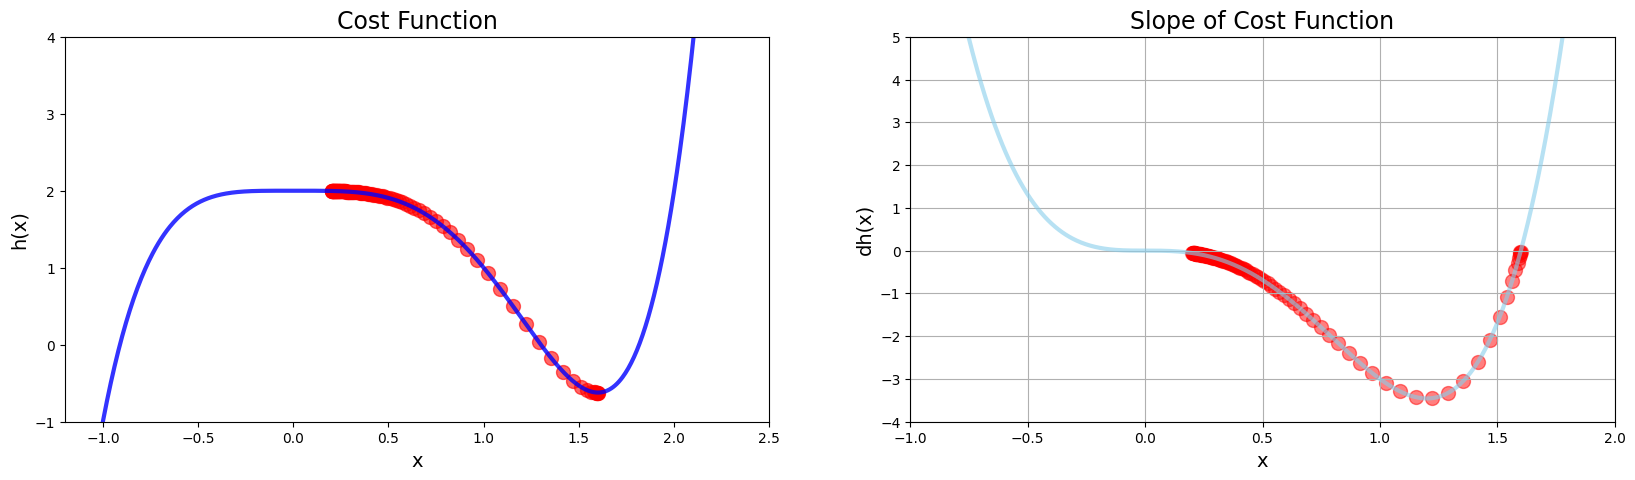

In [7]:
local_minimum, list_x, derivative_list = gradient_descent(derivative_function=dh, initial_guess=0.2)
print('Local minimum occurs at: ', local_minimum)
print('Cost at this minimum is: ', h(local_minimum))
print('Number of steps: ', len(list_x))

plt.figure(figsize=[20, 5])

# Plot 1 - Cost Function
plt.subplot(1, 2, 1)
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('h(x)', fontsize=14)

plt.plot(xData, h(xData), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# Plot 2 - Derivative Function
plt.subplot(1, 2, 2)

plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('dh(x)', fontsize=14)
plt.grid()

plt.plot(xData, dh(xData), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, derivative_list, color='red', s=100, alpha=0.5)

### Show Divergence and Overflow
If we change the starting x value to be less than zero the gradient descent will move further to the negative side and will eventually create an overflow when the x values and cost functoin exceed the limits of Python floating point numbers.

To investigate this we add a maximum iteration to the `gradient_descent()` function, so we can control how many iterations through the gradient descent we will use. If we start a $x = -0.2$ and use a maximum of 71 iterations:

Local minimum occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  71


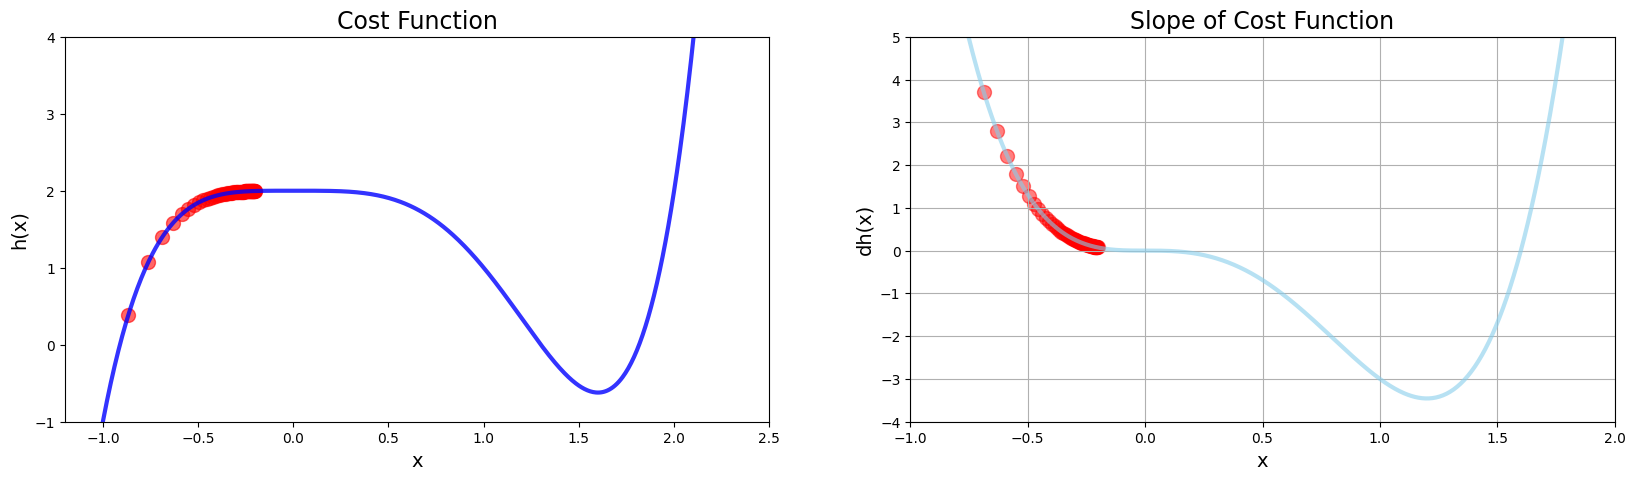

In [20]:
local_minimum, list_x, derivative_list = gradient_descent(derivative_function=dh, initial_guess=-0.2, multiplier=0.02, precision=0.001, maximum_iterations=71)
print('Local minimum occurs at: ', local_minimum)
print('Cost at this minimum is: ', h(local_minimum))
print('Number of steps: ', len(list_x))

plt.figure(figsize=[20, 5])

# Plot 1 - Cost Function
plt.subplot(1, 2, 1)
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('h(x)', fontsize=14)

plt.plot(xData, h(xData), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# Plot 2 - Derivative Function
plt.subplot(1, 2, 2)

plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('dh(x)', fontsize=14)
plt.grid()

plt.plot(xData, dh(xData), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, derivative_list, color='red', s=100, alpha=0.5)

As can be seen from the above results, with 71 iterations the algorithm has reached approximately $-1.8 \times  10^{24}$ for the $x$ value and approximately $-2.1 \times 10^{121}$ - which is reaching the limits of floating point values for Python. If we use 72 iterations, then we will get an overflow error as the limit is exceeded.

Note that there is no minimum to reach on this side of $x = 0$ as the cost function diverges towards negative infinity, so it is not possible to reach a minimum. Note also that as the gradient of the cost functon increases, the step size will also increase making the approach to negative infinity more rapid.